Welcome!

This notebook contains Machine Learning Pet Project on California Housing Prices Dataset. Enjoy!

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## California Housing Prices Datasets

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

## Data Cleaning

Missing values

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
207 / len(housing) * 100

1.002906976744186

Only about 1% percent of total number of bedrooms is missing. It is reasonable to drop this data or fill it with mean value.

In [8]:
housing = housing.fillna(housing['total_bedrooms'].mean())

## Exploratory Data Analysis (EDA)

Let's find out whether house price depends on location 

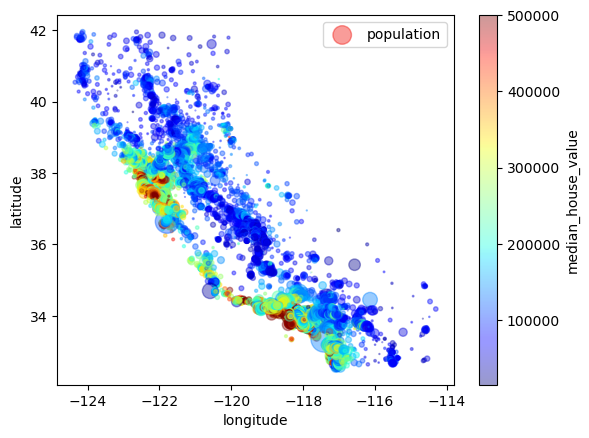

In [9]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
				s=housing['population']/100, label='population',
				c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend() 
plt.show()

We can clearly observe that houses on the coastline are more expensive. Let's see whether median income depends on location. Add one more graph.

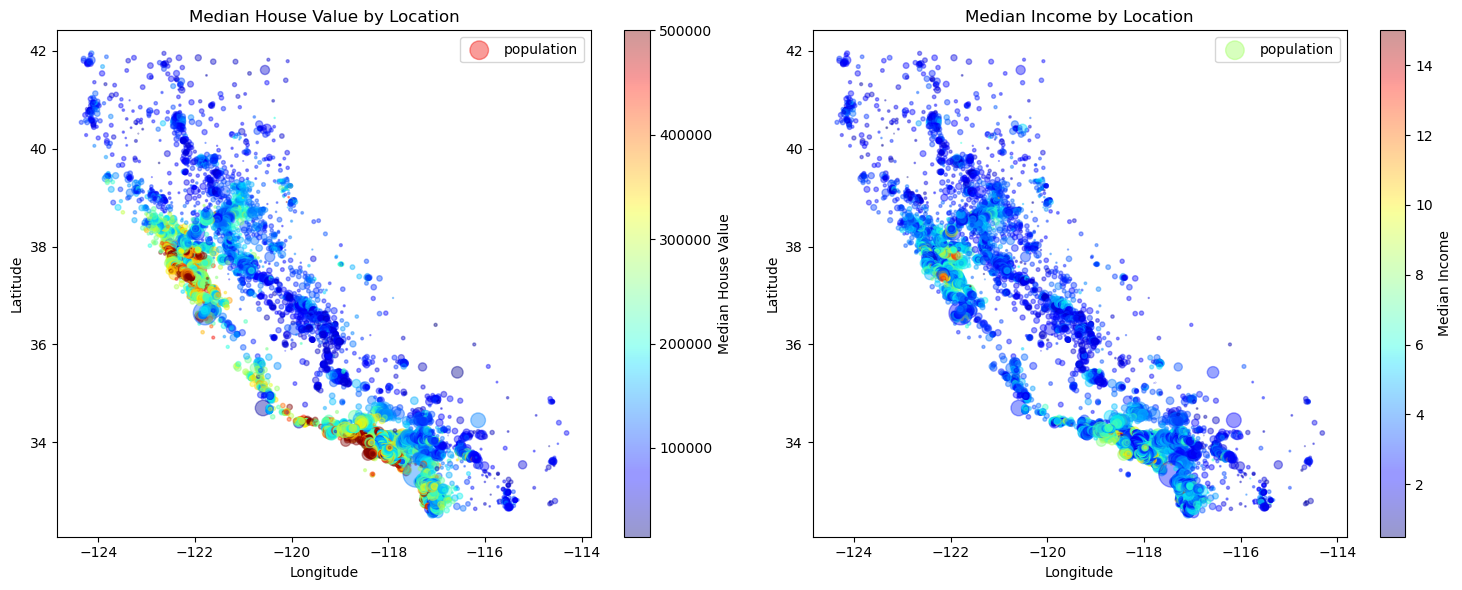

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Scatter for median_house_value
sc0 = ax[0].scatter(
    x=housing['longitude'], 
    y=housing['latitude'], 
    alpha=0.4,
    s=housing['population']/100, 
    c=housing['median_house_value'], 
    cmap='jet',
    label='population'
)
cbar0 = fig.colorbar(sc0, ax=ax[0])
cbar0.set_label("Median House Value")
ax[0].set_title("Median House Value by Location")
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
ax[0].legend()

# Scatter for median_income
sc1 = ax[1].scatter(
    x=housing['longitude'], 
    y=housing['latitude'], 
    alpha=0.4,
    s=housing['population']/100, 
    c=housing['median_income'], 
    cmap='jet',
    label='population'
)
cbar1 = fig.colorbar(sc1, ax=ax[1])
cbar1.set_label("Median Income")
ax[1].set_title("Median Income by Location")
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
ax[1].legend()

plt.tight_layout()
plt.show()

We see that income is higher, but it depends less on location than house value.

Let's explore ocean_proximity feature.

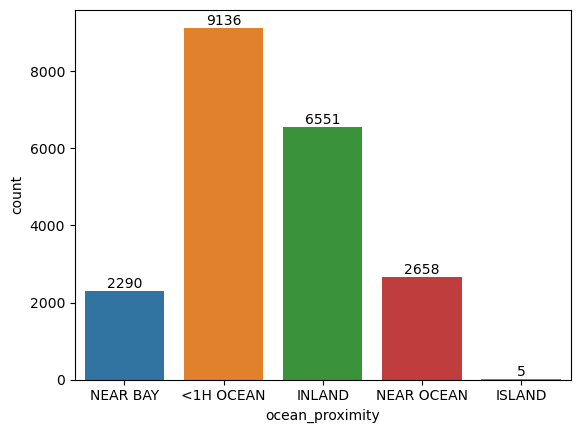

In [11]:
ax = sns.countplot(data=housing, x='ocean_proximity', hue='ocean_proximity')
for container in ax.containers:
    ax.bar_label(container)

We can see that most houses are in less than 1 hour proximity to the ocean.

In [12]:
ocean_proximity = housing.groupby('ocean_proximity').mean()['median_house_value'].sort_values()
ocean_proximity

ocean_proximity
INLAND        124805.392001
<1H OCEAN     240084.285464
NEAR OCEAN    249433.977427
NEAR BAY      259212.311790
ISLAND        380440.000000
Name: median_house_value, dtype: float64

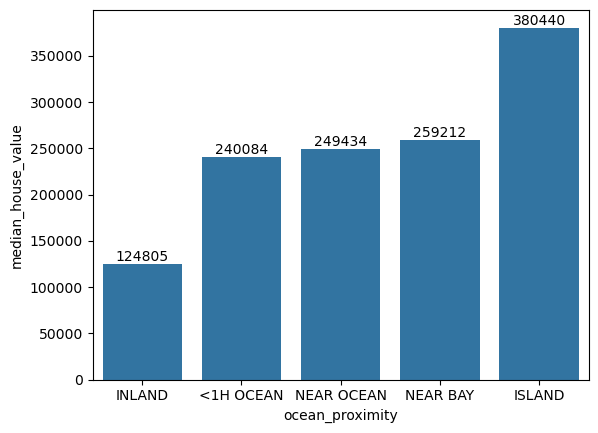

In [13]:
ax = sns.barplot(data=ocean_proximity)
for container in ax.containers:
    ax.bar_label(container)

The most expensive houses are ones on island, but there is only 5 entries about them. As expected, the least valuable houses are in land.

Let's see median_value_distribution.

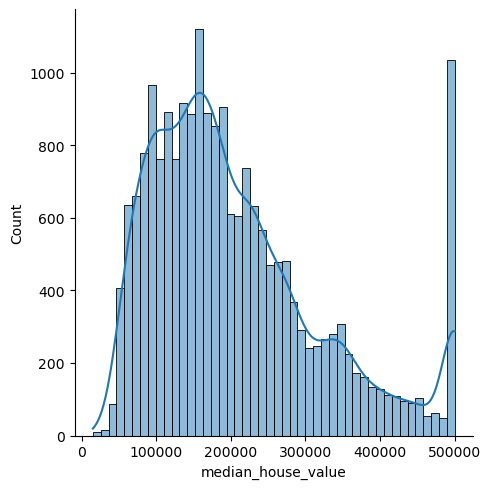

In [14]:
sns.displot(data=housing, x='median_house_value', kde=True)

Data seems like normal distribution in general. But there is a spike at around 500 000. 
These are outliers we should remove to prevent them from affecting our future model. 

Let's use Interquartile Range (IQR) to deal with them.

### IQR

In [15]:
median_house_value = housing['median_house_value']

Q1 = np.percentile(median_house_value, 25)
Q3 = np.percentile(median_house_value, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [16]:
lower_outliers = median_house_value[(median_house_value < lower)]
upper_outliers = median_house_value[(median_house_value > upper)]
outliers = lower_outliers + upper_outliers
outlier_percentage = len(outliers) / len(median_house_value) * 100

In [17]:
len(lower_outliers)

0

In [18]:
len(upper_outliers)

1071

In [19]:
outlier_percentage

5.188953488372093

In [20]:
upper_outliers

89       500001.0
140      483300.0
459      500001.0
489      489600.0
493      500001.0
           ...   
20422    500001.0
20426    500001.0
20427    500001.0
20436    500001.0
20443    500001.0
Name: median_house_value, Length: 1071, dtype: float64

In [21]:
n = int((upper_outliers == 500001).sum())
n

965

In [22]:
n / len(housing) * 100

4.675387596899225

It looks like almost all outliers have median_house_value equal to 500001 (which explains that spike on the distribution). Luckily, there is only under 5% of outliers.

In [23]:
housing = housing.drop(outliers.index)

Let's find out correlation between different features.

In [24]:
corr = housing.corr(numeric_only=True)

<Axes: >

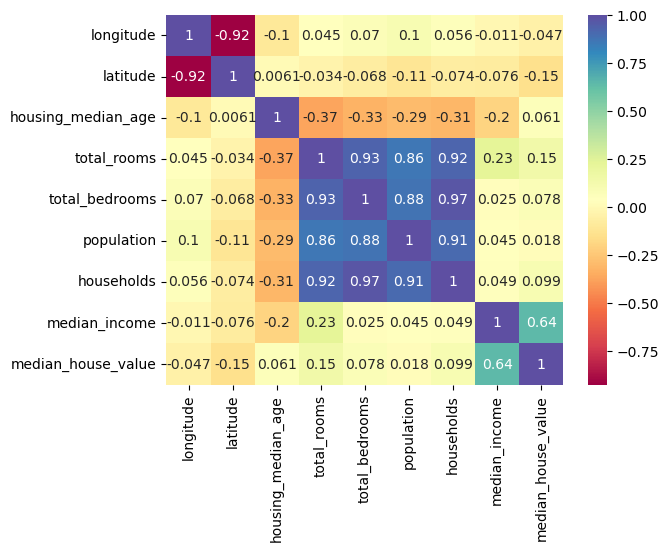

In [25]:
sns.heatmap(corr, annot=True, cmap='Spectral')

Heatmap shows that total_rooms, total_bedrooms, population, households are highly correlated. So we should consider reducing 4 features into 1.

In [26]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### One Hot Encoding

We have one categorical feature (ocean_proximity) into binary format.

In [27]:
data = housing.copy()

In [28]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [29]:
ocean = pd.get_dummies(data['ocean_proximity'], prefix='ocean', drop_first=True)
ocean.head()

,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False


In [30]:
data = pd.concat([data.drop('ocean_proximity', axis=1), ocean], axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19569 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19569 non-null  float64
 1   latitude            19569 non-null  float64
 2   housing_median_age  19569 non-null  float64
 3   total_rooms         19569 non-null  float64
 4   total_bedrooms      19569 non-null  float64
 5   population          19569 non-null  float64
 6   households          19569 non-null  float64
 7   median_income       19569 non-null  float64
 8   median_house_value  19569 non-null  float64
 9   ocean_INLAND        19569 non-null  bool   
 10  ocean_ISLAND        19569 non-null  bool   
 11  ocean_NEAR BAY      19569 non-null  bool   
 12  ocean_NEAR OCEAN    19569 non-null  bool   
dtypes: bool(4), float64(9)
memory usage: 1.6 MB


## Train-Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Features such as total_rooms, total_bedrooms, population and households are pretty highly correlated which can affect training process. So it is reasonable to deal with these features, for example via Principal Component Analysis (PCA) or use a model that punishes multicollinearity.

However it is not mandatory to reduce the number of dimensions, because our data sets is not highly dimensional in general. 

## Principal Component Analysis (PCA)

1. Fit scaler on train set, transfrom train set, trasform test set
2. Create train_corr, test_corr dataframes with correlated features only
3. Fit pca on train set, transfrom train set, trasform test set
4. Update X_train, X_test

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
high_corr_features = ['total_rooms', 'total_bedrooms', 'population', 'households']

In [37]:
scaler = StandardScaler()

In [38]:
train = scaler.fit_transform(X_train)
test = scaler.transform(X_test)

In [39]:
target = 'median_house_value'
columns = list(data.columns)

columns.remove(target)
print(columns)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEAR BAY', 'ocean_NEAR OCEAN']


In [40]:
train = pd.DataFrame(train, columns=columns)
train_corr = train[high_corr_features]

test = pd.DataFrame(test, columns=columns)
test_corr = test[high_corr_features]

In [41]:
train_corr = train_corr.to_numpy()
test_corr = test_corr.to_numpy()

In [42]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_corr)
test_pca = pca.transform(test_corr)

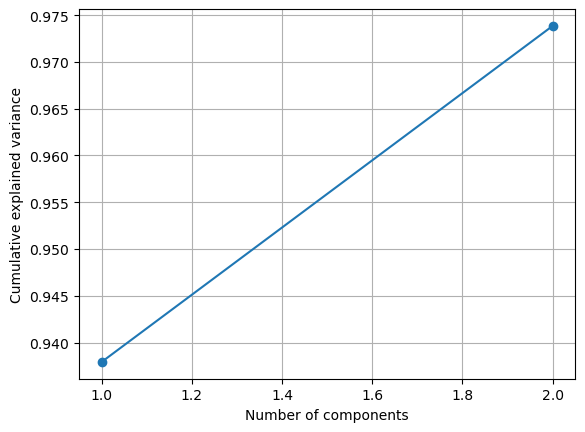

In [43]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.grid(True)
plt.show()

We see that 2 components can explain more than 97% of variance, which is very good.

In [44]:
train = train.drop(high_corr_features, axis=1)
train = pd.concat([train, pd.DataFrame(train_pca)], axis=1)
X_train = train.to_numpy()

test= test.drop(high_corr_features, axis=1)
test = pd.concat([test, pd.DataFrame(test_pca)], axis=1)
X_test = test.to_numpy()

In [45]:
X_train[0].shape

(10,)

## Model Selection

### Linear Model

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
linear_model =  LinearRegression()

In [48]:
linear_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
def regression_metrics(y_test, pred):
    print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, pred))
    print('Root Mean Squared Error (RMSE): ', mean_squared_error(y_test, pred)**0.5)
    print('R^2 score: ', r2_score(y_test, pred))

In [51]:
pred = linear_model.predict(X_test)

In [52]:
regression_metrics(y_test, pred)

Mean Absolute Error (MAE):  44306.275431558424
Root Mean Squared Error (RMSE):  59599.987860968205
R^2 score:  0.6159082222491031


R2 score is about 61-62% which is okay, but we can do better.

### Lasso 

In [56]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

In [58]:
lasso_grid = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error')

In [59]:
lasso_grid.fit(X_train, y_train)

D:\Conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.272e+13, tolerance: 1.138e+10
  model = cd_fast.enet_coordinate_descent(
D:\Conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.270e+13, tolerance: 1.136e+10
  model = cd_fast.enet_coordinate_descent(
D:\Conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.244e+13, tolerance: 1.134e+10
  model = cd_fast.enet_coordinate_d

,estimator,Lasso()
,param_grid,"{'alpha': [1e-15, 1e-10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,5


In [60]:
lasso_grid.best_estimator_

,alpha,5
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [61]:
pred = lasso_grid.predict(X_test)

In [62]:
regression_metrics(y_test, pred)

Mean Absolute Error (MAE):  44305.08815590882
Root Mean Squared Error (RMSE):  59598.94209859877
R^2 score:  0.6159217009499582


In [63]:
lasso = lasso_grid.best_estimator_

In [64]:
lasso.coef_

array([-51551.25036811, -51257.51719603,   9907.86864295,  50614.10258514,
       -21158.62451407,   2906.86704973,  -2421.12366944,    689.81907216,
         3548.15087692, -41183.37556088])

### ElasticNet

In [65]:
from sklearn.linear_model import ElasticNet

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
    'l1_ratio': [.1, .5, .7,.9, .95, .99, 1]
}

In [68]:
elastic_net_grid = GridSearchCV(ElasticNet(), param_grid, scoring='neg_mean_squared_error')

In [69]:
elastic_net_grid.fit(X_train, y_train)

D:\Conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.273e+13, tolerance: 1.138e+10
  model = cd_fast.enet_coordinate_descent(
D:\Conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.270e+13, tolerance: 1.136e+10
  model = cd_fast.enet_coordinate_descent(
D:\Conda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.245e+13, tolerance: 1.134e+10
  model = cd_fast.enet_coordinate_d

,estimator,ElasticNet()
,param_grid,"{'alpha': [1e-15, 1e-10, ...], 'l1_ratio': [0.1, 0.5, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.001


In [70]:
elastic_net_grid.best_estimator_

,alpha,0.001
,l1_ratio,0.7
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [71]:
pred = elastic_net_grid.predict(X_test)

In [72]:
regression_metrics(y_test, pred)

Mean Absolute Error (MAE):  44303.256828492216
Root Mean Squared Error (RMSE):  59597.35393636314
R^2 score:  0.615942170122779


LinearRegression, ElasticNet and Lasso's performance are almost the same

I would like to test a few more regressors. But in order to make my work slightly easier, 
I will create a class to test all models at the same time.

### Regressor Class

A unified interface for training, comparing, and selecting regression models with optional hyperparameter tuning.

#### Overview

Automatically trains and evaluates 9 different regression algorithms, tracks performance metrics, and identifies the best performing model based on test R² score.

#### Constructor Parameters

- **use_gridsearch**: Enable hyperparameter optimization
- **models**: Custom model dictionary (defaults to 9 algorithms)
- **param_grids**: Custom parameter grids for tuning
- **cv**: Cross-validation folds for grid search
- **scoring**: Metric for model selection (r2, neg_mean_squared_error, etc.)
- **show**: Print training progress

#### Default Models

LinearRegression, Ridge, Lasso, ElasticNet, DecisionTree, RandomForest, GradientBoosting, KNeighbors, AdaBoost

#### Key Methods

**run()**: Complete pipeline that fits, predicts, and evaluates all models. Returns DataFrame sorted by test R² score.

**Individual steps available**: fit(), predict(), evaluate()

#### Results

After running, the class provides:
- **results**: DataFrame with performance metrics and training time
- **best_model**: Best performing model instance  
- **best_model_name**: Name of best model
- **fitted_models**: All trained models

#### Output Metrics

- R2_Train: Training R² score
- R2_Test: Test R² score (models sorted by this)
- RMSE_Train: Training RMSE
- RMSE_Test: Test RMSE  
- Time_Elapsed_s: Training time

In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import time

class Regressor:
    def __init__(self, models=None, param_grids=None, scoring='r2', use_gridsearch=False, cv=5, show=True):
        self.cv = cv
        self.scoring = scoring
        self.use_gridsearch = use_gridsearch
        self.show = show

        # Default models
        if models is None:
            self.models = {
                'LinearRegression': LinearRegression(),
                'Ridge': Ridge(),
                'Lasso': Lasso(),
                'ElasticNet': ElasticNet(),
                'DecisionTree': DecisionTreeRegressor(),
                'RandomForest': RandomForestRegressor(),
                'GradientBoosting': GradientBoostingRegressor(),
                'KNeighbors': KNeighborsRegressor(),
                'AdaBoost': AdaBoostRegressor()
            }
        else:
            self.models = models

        # Default parameter grids
        self.default_param_grids = {
            'LinearRegression': {},
            'Ridge': {'alpha': [0.1, 1.0, 10.0]},
            'Lasso': {'alpha': [0.01, 0.1, 1.0]},
            'ElasticNet': {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.2, 0.5, 0.8]},
            'DecisionTree': {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]},
            'RandomForest': {'n_estimators': [50, 100], 'max_depth': [None, 5, 10]},
            'GradientBoosting': {'n_estimators': [100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
            'KNeighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
            'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]}
        }

        # Merge user-provided param_grids with defaults
        self.param_grids = self.default_param_grids.copy()
        if param_grids:
            for key, value in param_grids.items():
                if key in self.param_grids:
                    self.param_grids[key].update(value)
                else:
                    self.param_grids[key] = value

        self.fitted_models = {}
        self.models_params = {}      # store parameters of all fitted models
        self.predictions = {}       # {'model_name': {'train':..., 'test':...}}
        self.time_elapsed = {}      # store elapsed time for each model
        self.best_model_name = None
        self.best_model = None
        self.results = pd.DataFrame()

    def fit(self, X_train, y_train):
        for name, model in self.models.items():
            if self.show:
                print(f"\nFitting {name}...")

            start_time = time.time()

            if self.use_gridsearch and self.param_grids.get(name):
                grid = GridSearchCV(model, self.param_grids[name], cv=self.cv, scoring=self.scoring)
                grid.fit(X_train, y_train)
                best_model = grid.best_estimator_
                self.models_params[name] = grid.best_params_  # store best params from GridSearch
            else:
                model.fit(X_train, y_train)
                best_model = model
                self.models_params[name] = model.get_params()  # store default/fitted params

            self.fitted_models[name] = best_model
            elapsed = time.time() - start_time
            self.time_elapsed[name] = elapsed

            if self.show:
                print(f"{name} is trained in {elapsed:.2f}s\n")

    def predict(self, X_train, X_test):
        for name, model in self.fitted_models.items():
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)
            self.predictions[name] = {'train': y_train_pred, 'test': y_test_pred}

    def evaluate(self, y_train, y_test):
        results = []
        best_r2 = -float('inf')

        for name, preds in self.predictions.items():
            y_train_pred, y_test_pred = preds['train'], preds['test']

            r2_train = r2_score(y_train, y_train_pred)
            rmse_train = mean_squared_error(y_train, y_train_pred) ** 0.5
            r2_test = r2_score(y_test, y_test_pred)
            rmse_test = mean_squared_error(y_test, y_test_pred) ** 0.5
            elapsed = self.time_elapsed.get(name, None)

            results.append({
                'R2_Train': r2_train,
                'RMSE_Train': rmse_train,
                'R2_Test': r2_test,
                'RMSE_Test': rmse_test,
                'Time_Elapsed_s': elapsed
            })

            if r2_test > best_r2:
                best_r2 = r2_test
                self.best_model_name = name
                self.best_model = self.fitted_models[name]
                self.best_model_params = self.models_params[name]  # store best model params

        self.results = pd.DataFrame(results, index=self.fitted_models.keys())
        return self.results.sort_values(by='R2_Test', ascending=False)

    def run(self, X_train, y_train, X_test, y_test):
        """Convenience method to fit, predict, and evaluate all models"""
        self.fit(X_train, y_train)
        self.predict(X_train, X_test)
        return self.evaluate(y_train, y_test)


In [74]:
reg = Regressor()
reg.fit(X_train, y_train)
reg.predict(X_train, X_test)
reg_def = reg.evaluate(y_train, y_test)
reg_def


Fitting LinearRegression...
LinearRegression is trained in 0.01s


Fitting Ridge...
Ridge is trained in 0.62s


Fitting Lasso...
Lasso is trained in 0.06s


Fitting ElasticNet...
ElasticNet is trained in 0.01s


Fitting DecisionTree...
DecisionTree is trained in 0.19s


Fitting RandomForest...
RandomForest is trained in 8.94s


Fitting GradientBoosting...
GradientBoosting is trained in 2.63s


Fitting KNeighbors...
KNeighbors is trained in 0.10s


Fitting AdaBoost...
AdaBoost is trained in 0.59s



,R2_Train,RMSE_Train,R2_Test,RMSE_Test,Time_Elapsed_s
RandomForest,0.971002,16220.151075,0.804122,42561.970887,8.940694
GradientBoosting,0.768176,45862.021718,0.760296,47083.214752,2.632000
KNeighbors,0.778254,44854.118715,0.688132,53704.958370,0.096195
DecisionTree,1.000000,0.000000,0.631087,58410.451164,0.193936
Ridge,0.602323,60067.522317,0.615916,59599.401525,0.615144
Lasso,0.602323,60067.516519,0.615911,59599.776249,0.057559
LinearRegression,0.602323,60067.515941,0.615908,59599.987861,0.008476
ElasticNet,0.530270,65282.740182,0.545711,64817.886953,0.006054
AdaBoost,0.516518,66231.491445,0.527432,66109.041803,0.585851


In [75]:
reg.best_model

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
reg.best_model_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [77]:
reg = Regressor(use_gridsearch=True)
reg_grid = reg.run(X_train, y_train, X_test, y_test)
reg_grid


Fitting LinearRegression...
LinearRegression is trained in 0.00s


Fitting Ridge...
Ridge is trained in 0.06s


Fitting Lasso...
Lasso is trained in 0.39s


Fitting ElasticNet...
ElasticNet is trained in 0.76s


Fitting DecisionTree...
DecisionTree is trained in 2.96s


Fitting RandomForest...
RandomForest is trained in 106.56s


Fitting GradientBoosting...
GradientBoosting is trained in 58.15s


Fitting KNeighbors...
KNeighbors is trained in 4.18s


Fitting AdaBoost...
AdaBoost is trained in 37.33s



,R2_Train,RMSE_Train,R2_Test,RMSE_Test,Time_Elapsed_s
RandomForest,0.970977,16227.347817,0.803607,42617.853864,106.561597
GradientBoosting,0.837948,38344.356240,0.794844,43558.263743,58.150500
DecisionTree,0.809115,41615.965453,0.702571,52446.985463,2.961523
KNeighbors,1.000000,0.000000,0.698932,52766.786957,4.184491
ElasticNet,0.602250,60073.000510,0.616069,59587.524632,0.755204
Ridge,0.602323,60067.522317,0.615916,59599.401525,0.062145
Lasso,0.602323,60067.516519,0.615911,59599.776249,0.390858
LinearRegression,0.602323,60067.515941,0.615908,59599.987861,0.004526
AdaBoost,0.582430,61551.532243,0.588540,61686.857148,37.334653


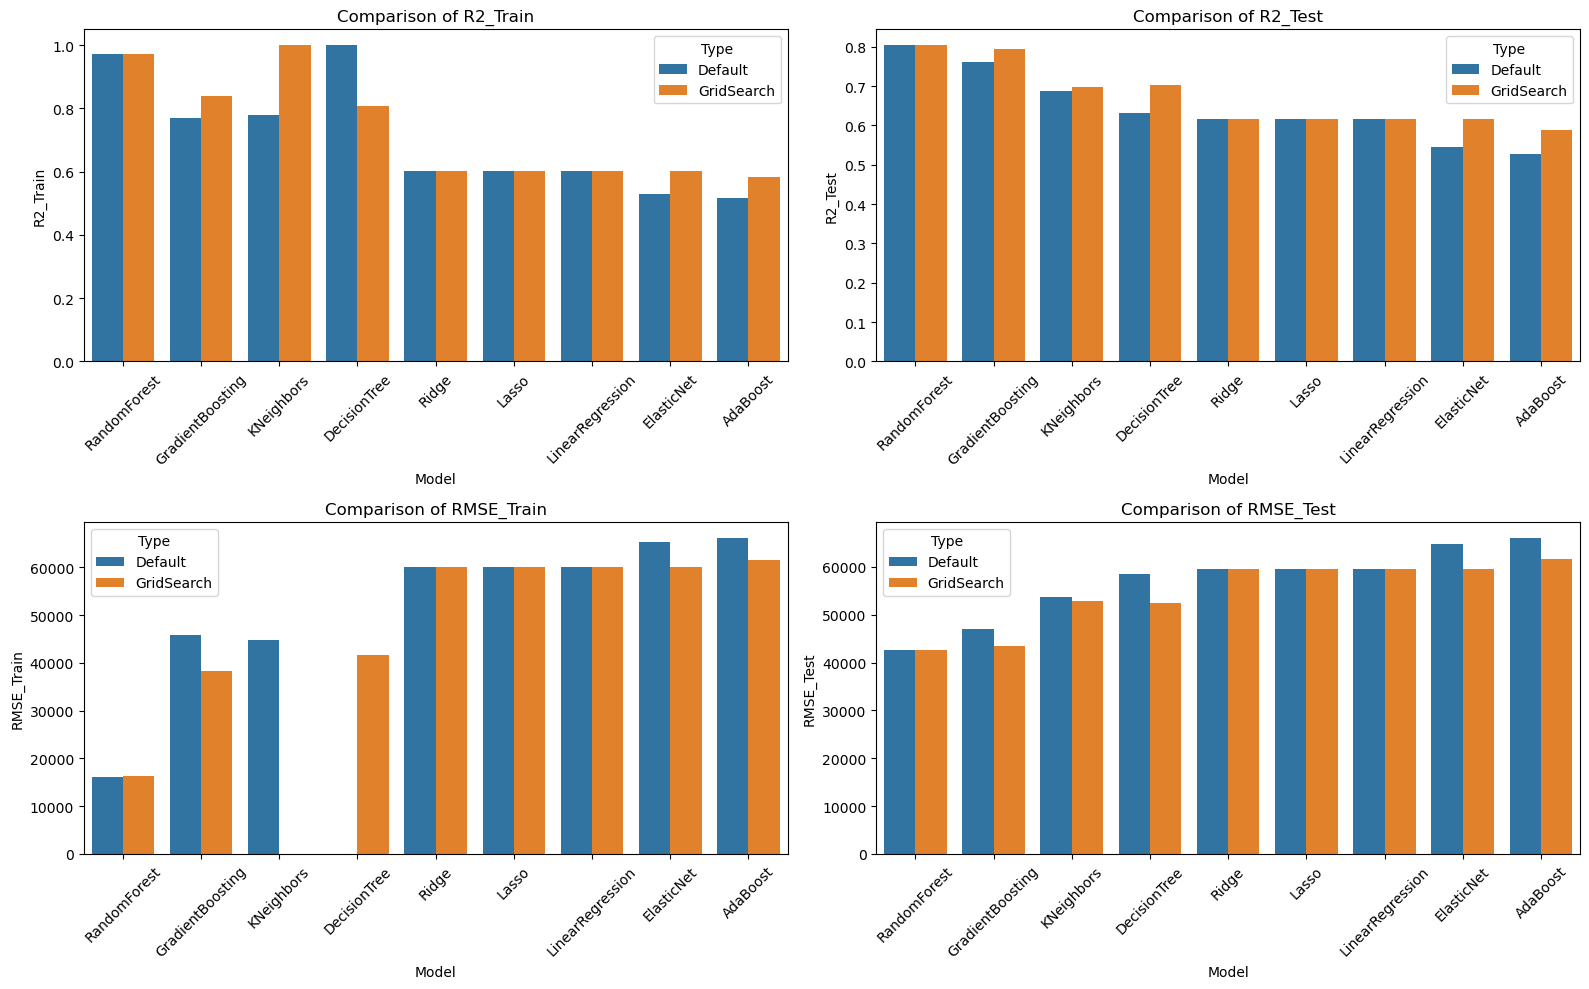

In [78]:
reg_def_copy = reg_def.copy()
reg_def_copy['Type'] = 'Default'

reg_grid_copy = reg_grid.copy()
reg_grid_copy['Type'] = 'GridSearch'

combined_df = pd.concat([reg_def_copy, reg_grid_copy], axis=0)
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'Model'}, inplace=True)

metrics = ['R2_Train', 'R2_Test', 'RMSE_Train', 'RMSE_Test']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    sns.barplot(data=combined_df, x='Model', y=metric, hue='Type', ax=ax)
    ax.set_title(f'Comparison of {metric}')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

RandomForest model appears to be the best one according to default values and gridsearch, 
so let's explore it further.

In [79]:
model = {'RandomForest':RandomForestRegressor()}
param_grid = {'RandomForest': {'n_estimators': [64, 100, 128, 200], 'max_depth': [None, 5, 10]},'max_features': [2, 3, 4]}

In [80]:
random_forest = Regressor(models=model, param_grids=param_grid, use_gridsearch=True)
random_forest_metric = random_forest.run(X_train, y_train, X_test, y_test)
random_forest_metric


Fitting RandomForest...
RandomForest is trained in 339.22s



,R2_Train,RMSE_Train,R2_Test,RMSE_Test,Time_Elapsed_s
RandomForest,0.971993,15940.621986,0.803968,42578.669488,339.220961


In [81]:
random_forest.best_model_params

{'max_depth': None, 'n_estimators': 200}